In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score
import pickle

In [6]:
df = pd.read_csv('../dataset/BreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.drop(['Unnamed: 32'],axis=1 ,inplace = True)

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

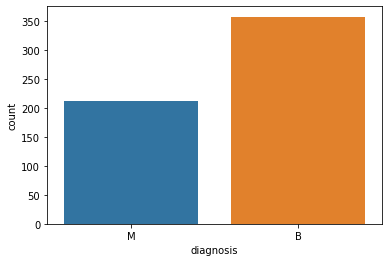

In [11]:
sns.countplot(x = 'diagnosis', data = df)

In [12]:
df['diagnosis'].replace(['M','B'], [1,0], inplace = True)

<AxesSubplot:>

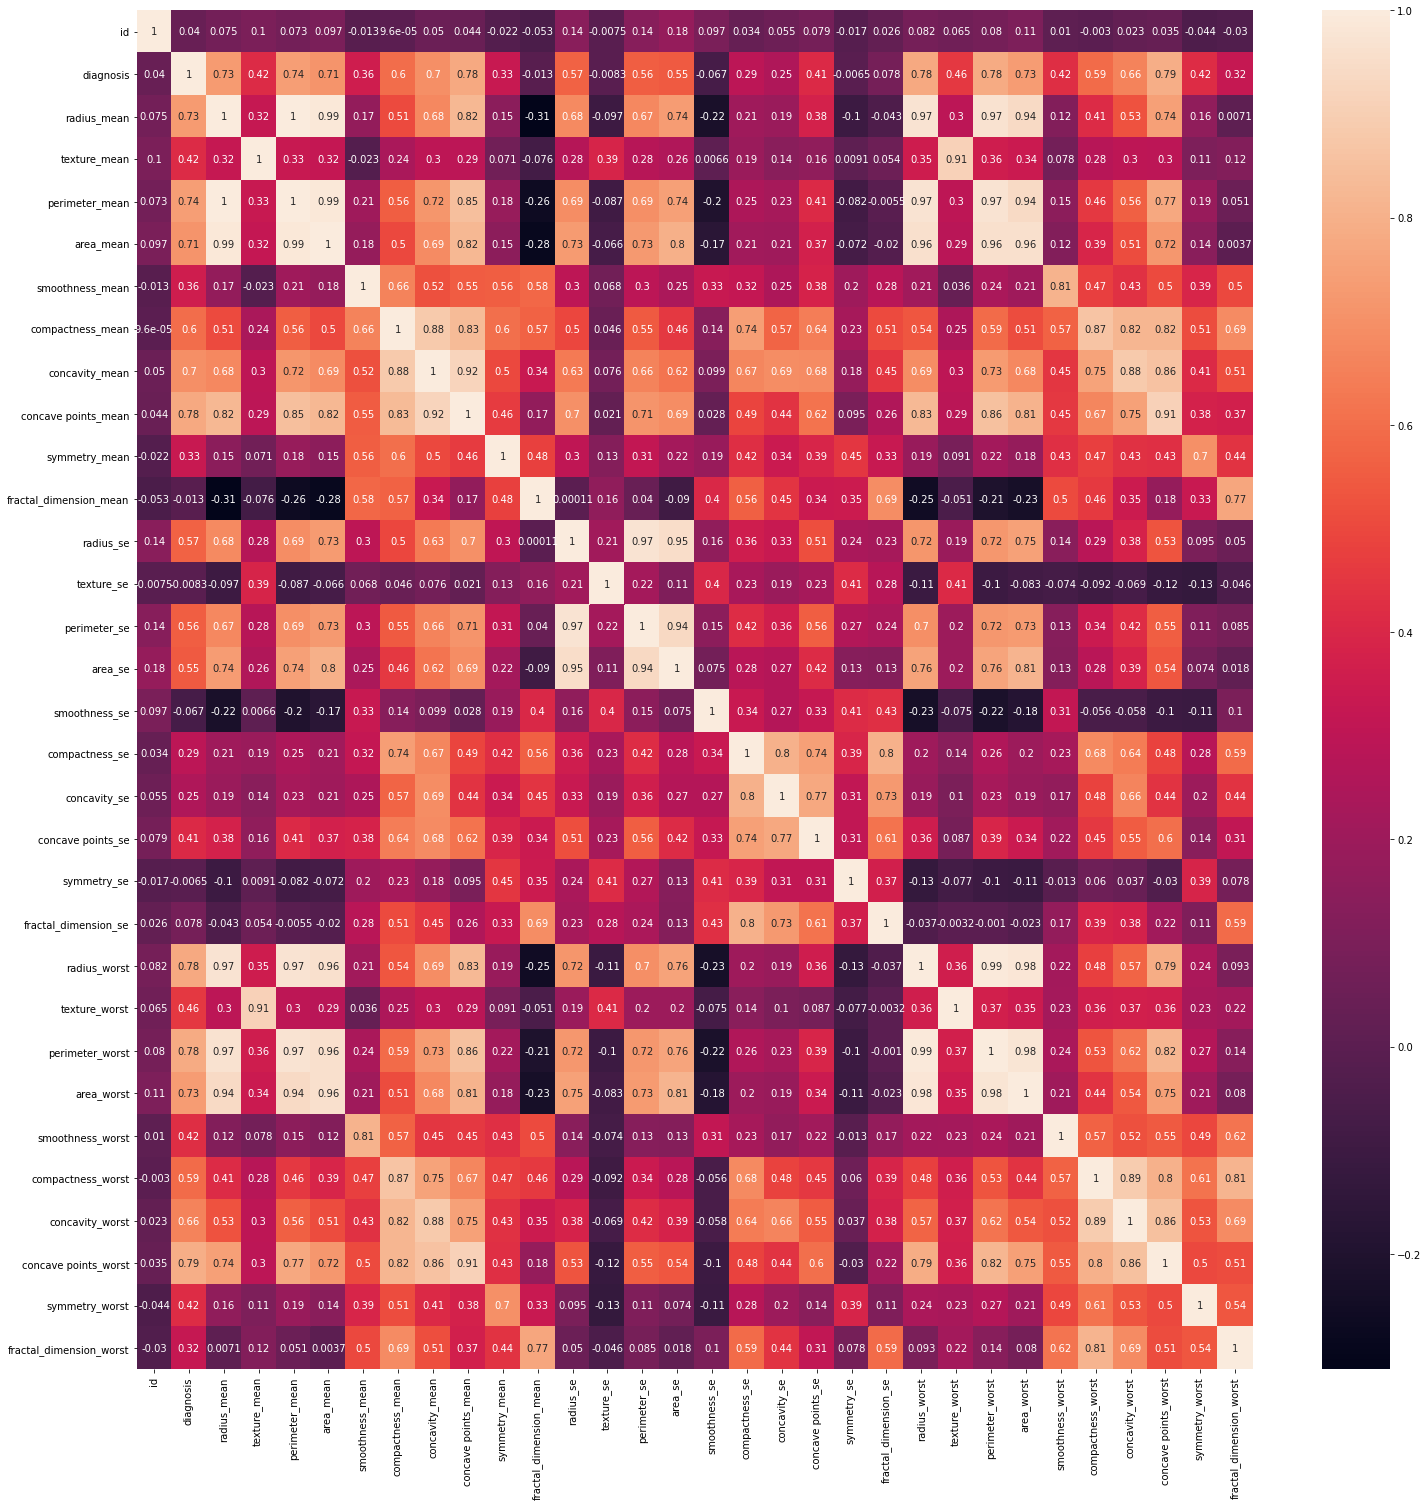

In [13]:
corr = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True)

In [14]:
# Dropping columns that have high correlations
df.drop(['perimeter_mean','radius_mean','perimeter_se','radius_se','perimeter_worst','area_worst','radius_worst',
         'texture_worst','concave points_mean','concave points_worst','id'],axis = 1,inplace = True)

In [15]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

<AxesSubplot:>

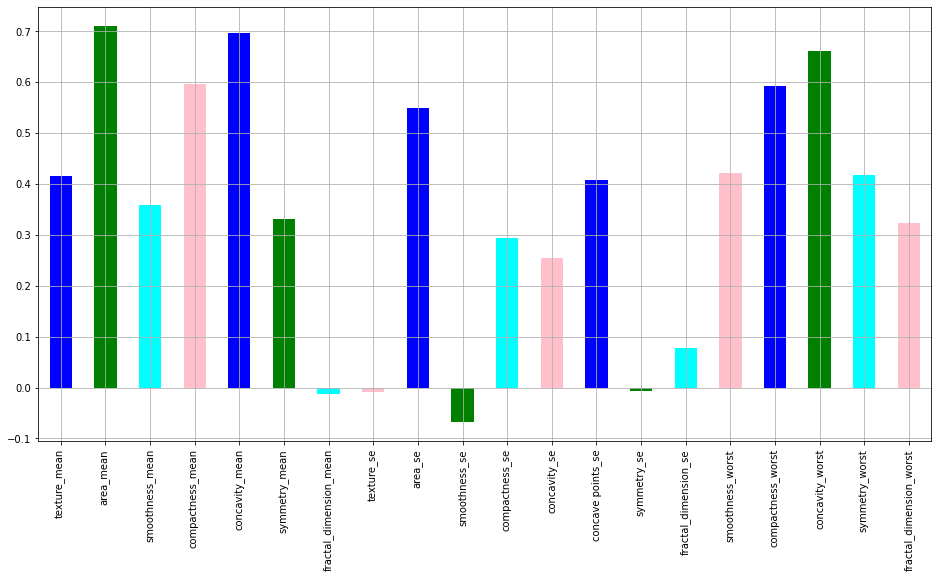

In [16]:
X.corrwith(y).plot.bar(grid=True,figsize=(16,8),color=['blue','green','cyan','pink'])

In [17]:
X.drop(['fractal_dimension_mean','texture_se','symmetry_se'],axis=1,inplace=True)

In [22]:
X.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [23]:
X.shape

(569, 17)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [163]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (455, 17) (455,)
Test Set:  (114, 17) (114,)


In [164]:
classifier = RandomForestClassifier(n_jobs = -1)
param_dist={'max_depth':[3,5,10,20,30],
              'n_estimators':[50,100,200,300,400,500],
               'criterion':['gini','entropy']
              }
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, cv = 10,
                                 scoring='roc_auc')

In [165]:
search_clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20, 30],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [166]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)

{'n_estimators': 500, 'max_depth': 20, 'criterion': 'entropy'}
0.9921142020026401


In [167]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=500,criterion='entropy',max_depth=20)

In [168]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500,
                       n_jobs=-1)

In [169]:
confusion_matrix(y_test, classifier.predict(X_test))

array([[73,  2],
       [ 0, 39]])

In [170]:
print(f"ROC_AUC score is {round(roc_auc_score(y_test, classifier.predict(X_test))*100,2)}%")

ROC_AUC score is 98.67%


In [171]:
pickle.dump(classifier, open('../models/cancer.pkl', 'wb'))